<a href="https://colab.research.google.com/github/keremshns/tensorflow_developer/blob/main/mnist_handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
#LOAD/SPLIT/INSPECT DATA
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

num_train_images = len(x_train)
img_shape = x_train[0].shape
labels_shape = y_train.shape

print("There are ", num_train_images, "images.")
print("Shape of an image: ",img_shape)
print("There are ", num_train_images, "labels.",labels_shape)

11490434/11490434 [==============================] - 2s 0us/step
There are  60000 images.
Shape of an image:  (28, 28)
There are  60000 labels. (60000,)


In [ ]:
#HYPERPARAMETERS
epochs = 50
batch_size = 128

In [6]:
#FUNCTION FOR NORMALIZATION
def normalizer(x_train, y_train, x_test, y_test):
  x_train = x_train/255.0
  x_test = x_test/255.0

  return (x_train, y_train), (x_test,y_test)


#FUNCTION FOR INSTANTIATING DATA GENERATOR OBJECTS
def create_generators(x_train, y_train, x_test, y_test):

  train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                           rotation_range=15,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                            shear_range=0.2,
                                                           zoom_range=0.1)

  val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                          rotation_range=15,
                                                         width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          shear_range=0.2,
                                                         zoom_range=0.1)
  return train_generator, val_generator





In [7]:
#RUN WHEN USING IMAGE DATA GENERATOR
#OBTAINING AUGMENTED DATA
train_generator, val_generator = create_generators(x_train, y_train, x_test, y_test)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

train_generator = train_generator.flow(x_train,
                                       y_train,
                                       batch_size=batch_size
                                       )

val_generator = val_generator.flow(x_test,
                                   y_test,
                                   batch_size=batch_size,
                                   )


In [ ]:
#RUN WHEN USING NORMALIZER
#JUST FOR PREPROCESSING THE DATA IF YOU DONT WANT TO USE IMAGE GENERATOR
(x_train, y_train), (x_test, y_test) = normalizer(x_train, y_train, x_test, y_test)

In [26]:
model = tf.keras.Sequential([

       tf.keras.layers.Conv2D(64, (5,5), activation="relu", input_shape=(28,28,1), padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (5,5), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, (5,5), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.GlobalMaxPooling2D(),
        tf.keras.layers.Dense(128, activation="relu"),
        #tf.keras.layers.BatchNormalization(),                  faster learning but worse at validation set
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),

])

model.summary()

callback = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/10))

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[callback])



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        51232     
                                                                 
 batch_normalization_13 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                      

Epoch 1/30
469/469 [==============================] - 27s 51ms/step - loss: 0.9086 - accuracy: 0.7313 - val_loss: 1.7229 - val_accuracy: 0.3712 - lr: 1.0000e-04
Epoch 2/30
469/469 [==============================] - 23s 49ms/step - loss: 0.1812 - accuracy: 0.9492 - val_loss: 0.1215 - val_accuracy: 0.9637 - lr: 1.2589e-04
Epoch 3/30
469/469 [==============================] - 23s 49ms/step - loss: 0.1128 - accuracy: 0.9657 - val_loss: 0.0972 - val_accuracy: 0.9687 - lr: 1.5849e-04
Epoch 4/30
469/469 [==============================] - 23s 49ms/step - loss: 0.0909 - accuracy: 0.9729 - val_loss: 0.0802 - val_accuracy: 0.9767 - lr: 1.9953e-04
Epoch 5/30
469/469 [==============================] - 23s 48ms/step - loss: 0.0801 - accuracy: 0.9759 - val_loss: 0.0760 - val_accuracy: 0.9747 - lr: 2.5119e-04
Epoch 6/30
469/469 [==============================] - 23s 48ms/step - loss: 0.0694 - accuracy: 0.9792 - val_loss: 0.0528 - val_accuracy: 0.9828 - lr: 3.1623e-04
Epoch 7/30
469/469 [==============

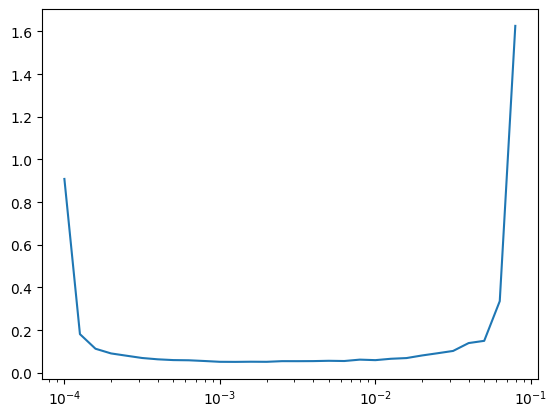

In [27]:
lr = history.history["lr"]
loss = history.history["loss"]
accuracy = history.history["accuracy"]

plt.semilogx(lr,loss)

In [ ]:
model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(64, (5,5), activation="relu", input_shape=(28,28,1), padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (5,5), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, (5,5), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.GlobalMaxPooling2D(),
        tf.keras.layers.Dense(128, activation="relu"),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),

])

model.summary()


optimizer = tf.keras.optimizers.Adam(lr=3e-3)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 batch_normalization_27 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 32)        51232     
                                                                 
 batch_normalization_28 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                      

Epoch 1/35
469/469 [==============================] - 26s 49ms/step - loss: 0.3267 - accuracy: 0.9000 - val_loss: 0.4610 - val_accuracy: 0.8646
Epoch 2/35
469/469 [==============================] - 23s 49ms/step - loss: 0.0826 - accuracy: 0.9741 - val_loss: 0.0708 - val_accuracy: 0.9770
Epoch 3/35
265/469 [===============>..............] - ETA: 8s - loss: 0.0644 - accuracy: 0.9806

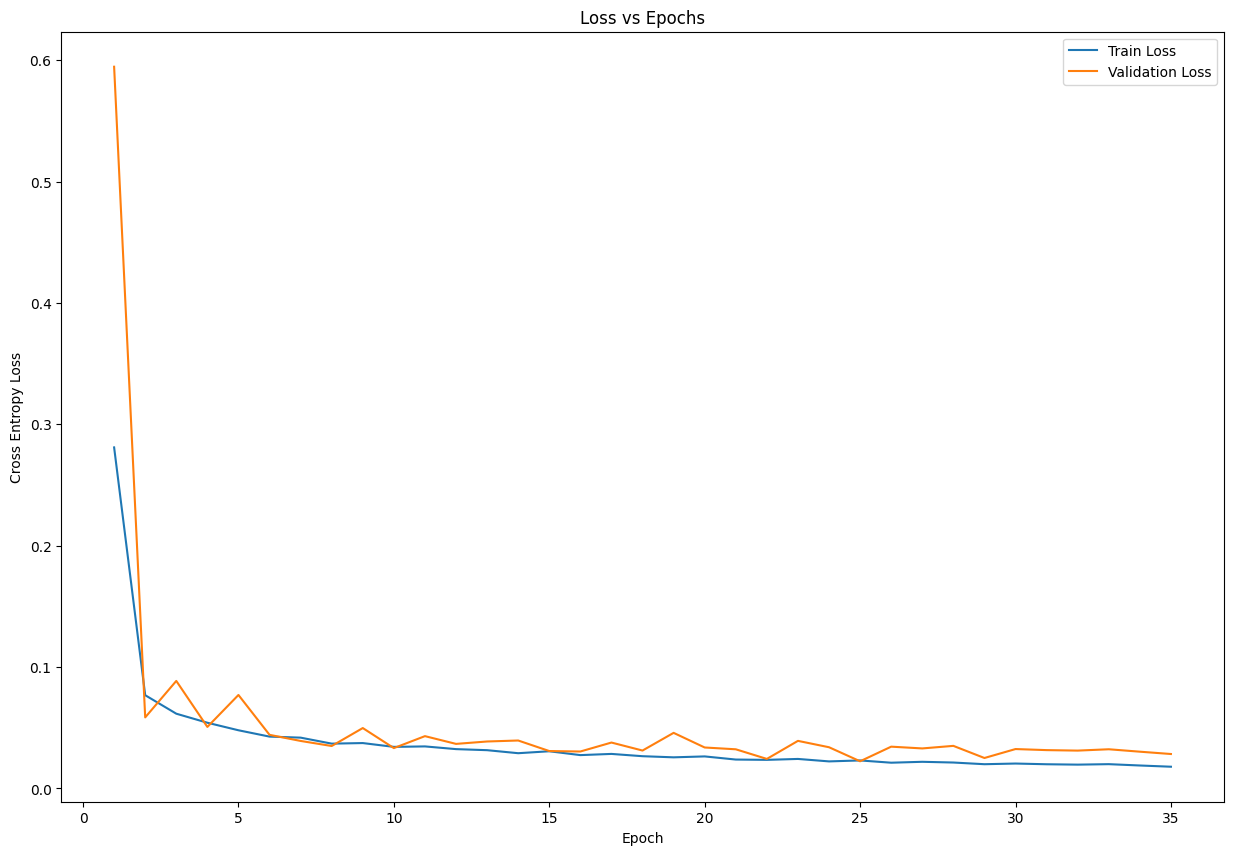

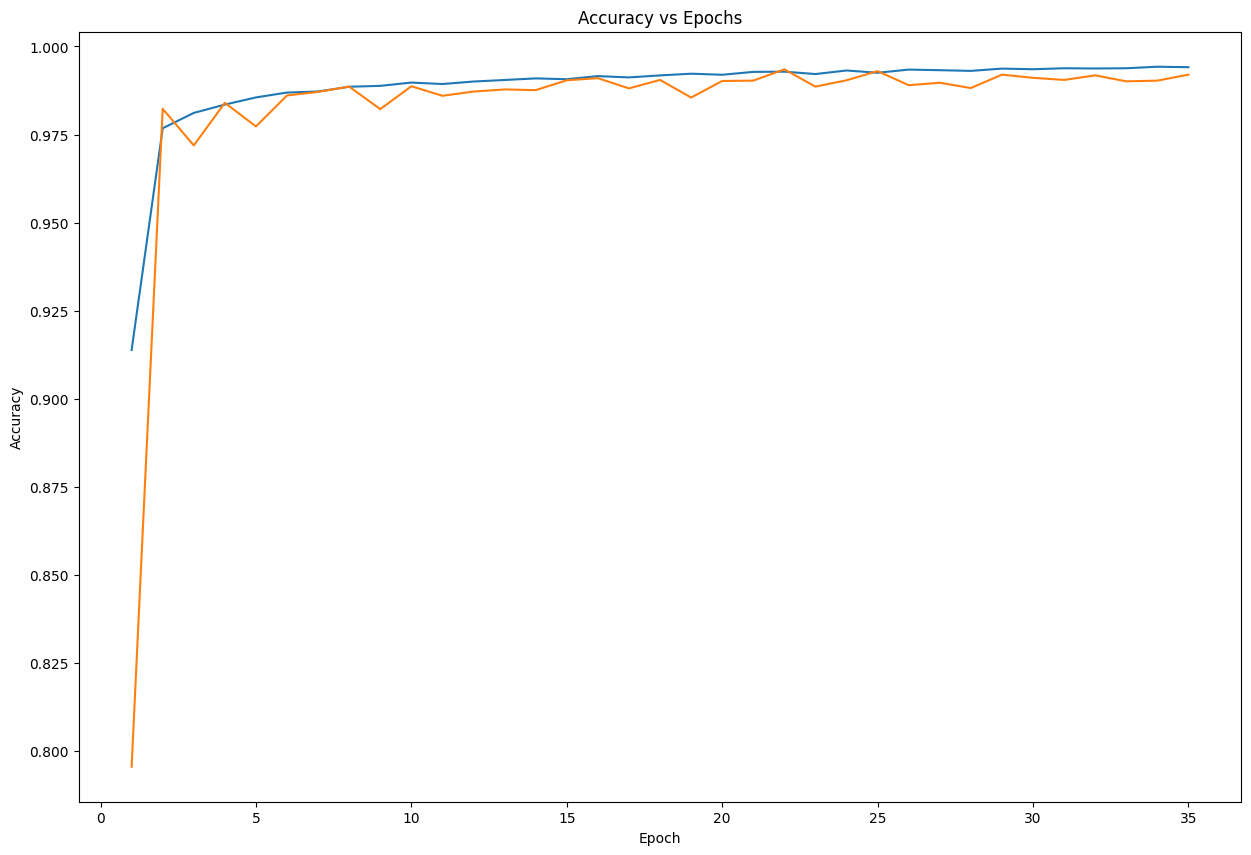

In [34]:
accuracy = history.history["accuracy"]
loss = history.history["loss"]
val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

#SMALL SEPERATE PLOTS
"""
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(range(epochs),accuracy)
plt.subplot(2,2,2)
plt.plot(range(epochs),loss)
plt.subplot(2,2,3)
plt.plot(range(epochs),val_accuracy)
plt.subplot(2,2,4)
plt.plot(range(epochs),val_loss)
plt.show()"""

#BIG PLOTS ON SAME GRAPH
plt.figure(figsize=(15,10))
plt.plot(range(1,epochs+1),loss,label='Train Loss')
plt.plot(range(1,epochs+1),val_loss,label='Validation Loss')
#plt.xlim(range(1,epochs+1))
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(range(1,epochs+1),accuracy)
plt.plot(range(1,epochs+1),val_accuracy,label='Validation Accuracy')
#plt.xlim(range(1,epochs+1))
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
